In [5]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 182MB/s]
100% 1.06G/1.06G [00:07<00:00, 161MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [9]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
validation = validation.map(process)

In [11]:
m1 = Sequential()
m1.add(Conv2D(64, (3,3),activation='relu',input_shape=(256,256,3)))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32, (3,3),activation='relu'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dropout(0.1))
m1.add(Dense(32,activation='relu'))
m1.add(Dropout(0.1))
m1.add(Dense(2,activation='softmax'))


m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                        

In [13]:
h1=m1.fit(train,validation_data=validation,epochs=5)

Epoch 1/5
625/625 [==============================] - 94s 129ms/step - loss: 1.5790 - accuracy: 0.5494 - val_loss: 0.6595 - val_accuracy: 0.5874
Epoch 2/5
625/625 [==============================] - 73s 116ms/step - loss: 0.6515 - accuracy: 0.6244 - val_loss: 0.6498 - val_accuracy: 0.6472
Epoch 3/5
625/625 [==============================] - 73s 116ms/step - loss: 0.6184 - accuracy: 0.6658 - val_loss: 0.5872 - val_accuracy: 0.6930
Epoch 4/5
625/625 [==============================] - 76s 120ms/step - loss: 0.5683 - accuracy: 0.7109 - val_loss: 0.6979 - val_accuracy: 0.6806
Epoch 5/5
625/625 [==============================] - 75s 119ms/step - loss: 0.5250 - accuracy: 0.7452 - val_loss: 0.5658 - val_accuracy: 0.7210


In [14]:
r1=pd.DataFrame(h1.history)
r1['epochs']=h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,epochs
0,1.579000,0.54945,0.659505,0.5874,0
1,0.651534,0.62440,0.649783,0.6472,1
2,0.618354,0.66580,0.587195,0.6930,2
3,0.568317,0.71085,0.697858,0.6806,3
4,0.525010,0.74515,0.565799,0.7210,4


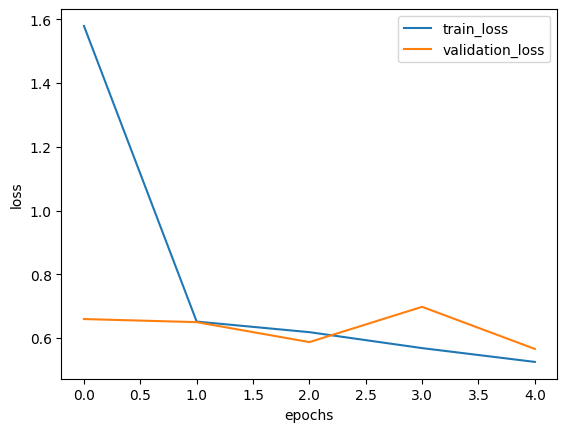

In [15]:
plt.plot(r1['epochs'],r1['loss'],label='train_loss')
plt.plot(r1['epochs'],r1['val_loss'],label='validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

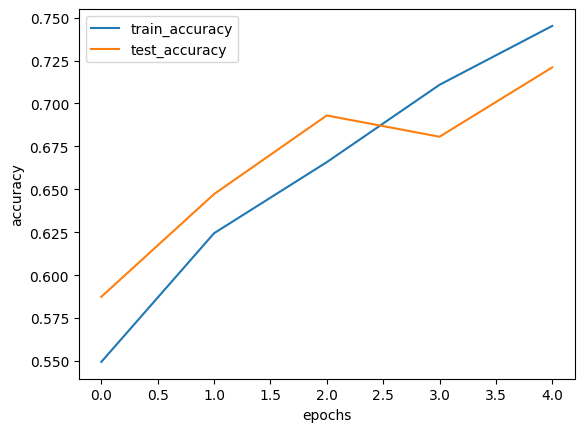

In [16]:
plt.plot(r1['epochs'],r1['accuracy'],label='train_accuracy')
plt.plot(r1['epochs'],r1['val_accuracy'],label='test_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
import cv2

In [43]:
test_img = cv2.imread('/content/cat.12.jpg')


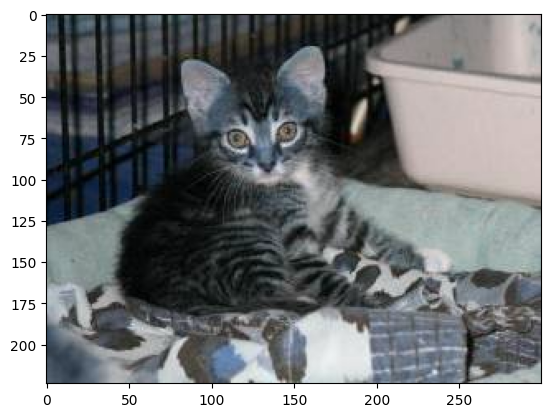

In [44]:
plt.imshow(test_img)
plt.show()

In [45]:
test_img.shape

(224, 300, 3)

In [46]:
test_img =cv2.resize(test_img,(256,256))

In [47]:
test_input=test_img.reshape((1,256,256,3))

In [48]:
r1=m1.predict(test_input)

1/1 [==============================] - 0s 20ms/step


In [49]:
#cat=0 dog=1
accuracy=[np.argmax(i) for i in r1]
print(accuracy)

[0]
